<center>
    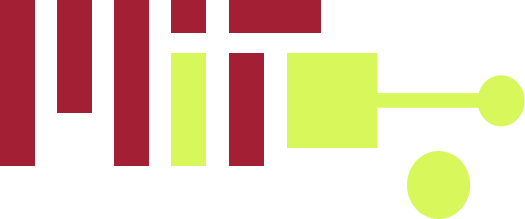
</center>



<!-- 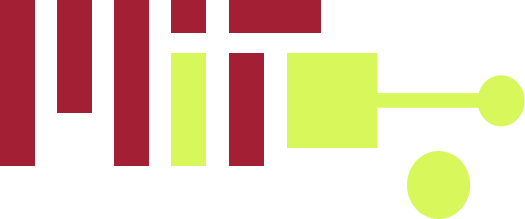 -->

# State Preparation Workshop: Classiq Challenge

**We now have a new Web-SDK with a Python environment set up for you and a personal workspace where all your work will be saved!**  
Please upload this notebook to the Web-SDK on our [platform](https://platform.classiq.io/) in your persistent user workspace and try solving it there.

## Welcome to the Classiq Prepration Workshop of the MIT iQuHack Hackathon 2025!

### Motivation

**State Preparation** is a fundamental step in quantum algorithms, enabling quantum systems to start from well-defined initial states. Efficient state preparation is crucial as it directly impacts the accuracy and scalability of quantum computations.

**With the scaling of quantum hardware, achieving efficient and precise state preparation will directly improve the costs of quantum algorithms and enhance impactful applications!**

**Your resources:**
- The Classiq IDE at [platform.classiq.io](https://platform.classiq.io/).
- The [Classiq Library](https://github.com/Classiq/classiq-library) – the largest collection of quantum functions, algorithms, and tutorials.
- [Classiq's documentation](https://docs.classiq.io/latest/), and the [Classiq101](https://docs.classiq.io/latest/classiq_101/) for quick onboarding to high-level quantum modelling concepts.
- The [Classiq Community Slack](https://short.classiq.io/join-slack) – where the Classiq team will address any questions, including implementation-related queries.

### If you are not using the Web-SDK:

1. Firstly, if you haven't already, install the Classiq SDK package. If it's already installed, make sure to update it to the latest version.

In [1]:
# !pip install -U classiq

2. Authenticate your device against the Classiq backend:

In [2]:
import classiq

# classiq.authenticate() # Uncoment to authenticate. For the first (local) run only

### Classiq 101

The [Classiq101](https://docs.classiq.io/latest/classiq_101/) is a great resource for getting the basics of the concept of high-level modeling quickly.\
As a first step, take a couple of minutes to go through the first page of the Classiq Overview Tutorial from The Classiq Tutorial [here](https://docs.classiq.io/latest/explore/tutorials/basic_tutorials/the_classiq_tutorial/classiq_overview_tutorial/)

In [3]:
from classiq import *


@qfunc
def main(x: Output[QNum], y: Output[QNum], z: Output[QNum]):
    pass  # Delete the `pass` and complete the `main` function

In [5]:
# Uncommented after you create your main function:

# qmod = create_model(main)
# qprog = synthesize(qmod)
# show(qprog)

<details markdown>
<summary>Check Yourself Here!</summary>

The solution:

```python
@qfunc
def main(x: Output[QNum], y: Output[QNum], z: Output[QNum]):
    allocate(3, x)
    allocate(3, z)
    hadamard_transform(x)
    hadamard_transform(z)
    
    y |= 2*x + 4*z + 2
```
\
If you didn't get a similar solution, copy-paste and run this one!

### State Prepration

Classiq provides many different high-level functions, allowing quick state preparation. We will review few particularly useful ones.

#### The `prepare_state()` function:

Let's say you have a list of probabilities and wish to prepare a quantum state corresponding to this probability distribution.  
The `prepare_state()` function takes a normalized probabilities list, an accuracy bound (L2 metric), and a variable of type `QArray`.

In [6]:
import numpy as np

from classiq import *

rand_array = np.random.rand(32)
normalized_random_list = (rand_array / np.sum(rand_array)).tolist()

print(f"The list: \n{normalized_random_list}")


@qfunc
def main(x: Output[QArray[QBit]]):
    prepare_state(probabilities=normalized_random_list, bound=0.01, out=x)


qmod = create_model(main)  # Creating the quantum model
qprog = synthesize(qmod)  # Creating the quantum program

The list: 
[0.05984345527001348, 0.03943762070383255, 0.01851726675859637, 0.026631557968690534, 0.04734940756793489, 0.024883406414067586, 0.01861389013773347, 0.05319569399341234, 0.0426486018576921, 0.04583565709808009, 0.012059116316875434, 0.03187300851417112, 0.005358246346087797, 0.022649763672352552, 0.03575807091398825, 0.005924971823074229, 0.022900587005867605, 0.03811558456654352, 0.017118625935907975, 0.013113604250773136, 0.04746833013385621, 0.018578223485882076, 0.04858118516824086, 0.0028375340859613132, 0.023901045623823648, 0.017017108534017975, 0.011854111836952473, 0.04398071728021124, 0.05755342403587098, 0.04853915574587328, 0.03800167022932132, 0.059859356724293454]


In [7]:
show(qprog)

Opening: https://platform.classiq.io/circuit/2tGKS4W4C1qZwMx0gZjgQkJ1UvE?version=0.66.1


#### Numeric Assignment:

Classiq supports various numerical assignment methods.  
Let's demonstrate a simple use case of these capabilities. Assume we want to calculate the sum of two quantum variables, `x` and `y`, with some values, in the $\mathbb{R}$ domain, and output the result in another variable, `res`. We can achieve this using the `QNum` type and the numerical assignment capabilities.

In [8]:
from classiq import *


@qfunc
def main(
    res: Output[QNum], x: Output[QNum[3, UNSIGNED, 0]], y: Output[QNum[5, SIGNED, 1]]
):
    # Using numerical assignment:
    x |= 5
    y |= -7.5
    res |= x + y


qmod = create_model(main)
qprog = synthesize(qmod)

In [9]:
show(qprog)

Opening: https://platform.classiq.io/circuit/2tGKSb9Q93D9Ct5KnEsp1IYpajJ?version=0.66.1


<details markdown>
<summary>Note on Local Variables</summary>

The same function using local variables:

```python
@qfunc
def main(res: Output[QNum]):
    # Initializing local variables `x` and `y`:
    x = QNum()
    y = QNum()

    # Using numerical assignment:
    x |= 5
    y |= -7.5
    res |= x + y


<details markdown>
<summary>Note on Numeric Assignment</summary>

The `|=` operator assumes no prior allocation of qubits. If you're using an already initialized variable, you may use the in-place XOR operator `^=`. Additionally, the `+=` operator can be used to intuitively add a value to an already initialized variable.

Read more: [Numeric Assignment](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/numeric-assignment/?h=numeric)

</details>


You can learn more about it [here](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/numeric-assignment/).

#### Amplitude-Encoding Assignment:

In [10]:
from classiq import *

a = 3
b = 2


@qfunc
def main(x: Output[QNum[5, UNSIGNED, 5]], y: Output[QNum]) -> None:
    allocate(5, x)
    hadamard_transform(x)
    allocate(1, y)

    y *= x**2


qmod = create_model(main)
qprog = synthesize(qmod)

In [11]:
res = execute(qprog).get_sample_result()

In [12]:
res.parsed_counts

[{'x': 0.25, 'y': 0}: 75,
 {'x': 0.0625, 'y': 0}: 74,
 {'x': 0.03125, 'y': 0}: 72,
 {'x': 0.28125, 'y': 0}: 72,
 {'x': 0.59375, 'y': 0}: 69,
 {'x': 0.09375, 'y': 0}: 69,
 {'x': 0.5, 'y': 0}: 68,
 {'x': 0.21875, 'y': 0}: 67,
 {'x': 0.375, 'y': 0}: 67,
 {'x': 0.3125, 'y': 0}: 63,
 {'x': 0.46875, 'y': 0}: 62,
 {'x': 0.5625, 'y': 0}: 61,
 {'x': 0.4375, 'y': 0}: 61,
 {'x': 0.40625, 'y': 0}: 59,
 {'x': 0.1875, 'y': 0}: 58,
 {'x': 0.125, 'y': 0}: 58,
 {'x': 0.15625, 'y': 0}: 57,
 {'x': 0.9375, 'y': 1}: 55,
 {'x': 0.625, 'y': 0}: 54,
 {'x': 0.0, 'y': 0}: 53,
 {'x': 0.53125, 'y': 0}: 53,
 {'x': 0.34375, 'y': 0}: 52,
 {'x': 0.75, 'y': 0}: 51,
 {'x': 0.96875, 'y': 1}: 51,
 {'x': 0.90625, 'y': 1}: 50,
 {'x': 0.78125, 'y': 0}: 44,
 {'x': 0.71875, 'y': 0}: 44,
 {'x': 0.65625, 'y': 0}: 41,
 {'x': 0.8125, 'y': 0}: 40,
 {'x': 0.6875, 'y': 0}: 36,
 {'x': 0.84375, 'y': 0}: 35,
 {'x': 0.875, 'y': 1}: 30,
 {'x': 0.8125, 'y': 1}: 28,
 {'x': 0.875, 'y': 0}: 25,
 {'x': 0.84375, 'y': 1}: 23,
 {'x': 0.78125, 'y

In [13]:
res.parsed_counts_of_outputs("x")  # Only "correct" results

[{'x': 0.59375}: 76,
 {'x': 0.25}: 75,
 {'x': 0.5}: 74,
 {'x': 0.0625}: 74,
 {'x': 0.75}: 73,
 {'x': 0.03125}: 72,
 {'x': 0.28125}: 72,
 {'x': 0.9375}: 71,
 {'x': 0.90625}: 70,
 {'x': 0.09375}: 69,
 {'x': 0.375}: 68,
 {'x': 0.8125}: 68,
 {'x': 0.5625}: 67,
 {'x': 0.21875}: 67,
 {'x': 0.78125}: 66,
 {'x': 0.46875}: 63,
 {'x': 0.53125}: 63,
 {'x': 0.4375}: 63,
 {'x': 0.3125}: 63,
 {'x': 0.625}: 61,
 {'x': 0.96875}: 61,
 {'x': 0.40625}: 60,
 {'x': 0.1875}: 58,
 {'x': 0.125}: 58,
 {'x': 0.84375}: 58,
 {'x': 0.6875}: 57,
 {'x': 0.15625}: 57,
 {'x': 0.875}: 55,
 {'x': 0.71875}: 53,
 {'x': 0.0}: 53,
 {'x': 0.34375}: 52,
 {'x': 0.65625}: 51]

In [14]:
show(qprog)

Opening: https://platform.classiq.io/circuit/2tGKTkbrSqD7OVUaO0YCUnoM4FI?version=0.66.1


You can learn more about it [here](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/amplitude-encoding-assignment/)

<details markdown>
<summary markdown>Note on QNum type</summary>

The `QNum` type is a `QArray` that contains additional information that helps interpret the quantum state as a scalar or as a superposition of those encoded in a quantum state, as well as other useful information for numerical operations. You may read and learn more about it [here](https://docs.classiq.io/latest/qmod-reference/language-reference/quantum-types/)

</details>

**The [classiq-library repository](https://github.com/Classiq/classiq-library) contains the largest collection of updated functions, tutorials, and implementations of algorithms and applications, all fully available for your use.**

#### Warm-Up Exercise

For better preparation for the hackathon, try solving the following task as a warm-up:

- implement an algorithm that prepares an exponential state with a decay rate of `0.1`
- Allocate 5 qubits to the variable `x`
- Apply QFT on the exponential state

<details>
<summary>Bonus Exercise</summary>

Adapt the `create_model` function to use `ExecutionPreferences`, and set the backend to `backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR` as well as `num_shots=1`.

**Read more [here](https://docs.classiq.io/latest/sdk-reference/execution/?h=executionpreferences#classiq.execution.ExecutionPreferences)**

</details>


In [15]:
from classiq import *


@qfunc
def main(x: Output[QArray[QBit]]):
    pass  # Delete and complete the `main` function

In [17]:
# Uncommented after you create your main function:

# qmod = create_model(main) # Adapt in Bouns Exercise
# qprog = synthesize(qmod)

In [ ]:
show(qprog)

# Looking Forward to Connecting During the Challenge!
### Good Luck! 